In [1]:
## reload submodule
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("./data/_^spx.csv", index_col=0, parse_dates=[0], sep=",")
data

,open,high,low,close,volume,signal
date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3959140000,1
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,4414080000,1
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3893450000,1
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3923560000,1
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,4311770000,1
...,...,...,...,...,...,...
2025-04-01,5597.529785,5650.569824,5558.520020,5633.069824,4434500000,-1
2025-04-02,5580.759766,5695.310059,5571.479980,5670.970215,4243830000,-1
2025-04-03,5492.740234,5499.529785,5390.830078,5396.520020,7210470000,-1


In [4]:
from qfin.backtester.runners import bt_signal_change

backtest_params = {
    "initial_balance": 10000,
    "default_entry_value": 1,
    "default_entry_value_max": 10000,
    "commission": 0.001,
}

# running a predefined strategy
bt = bt_signal_change(data, **backtest_params)

In [5]:
stats = bt.stats()
stats

Start                     2023-01-03 00:00:00
End                       2025-04-07 00:00:00
Duration                    825 days 00:00:00
Exposure Time [%]                   96.296296
Equity Start                            10000
Equity Peak                             25748
Equity Final                            25748
Equity Return [%]                      157.48
Balance Start                           10000
Balance Peak                            25748
Balance Final                           25748
Balance Return [%]                     157.48
Gross Return [%]                       159.71
Total Commissions                         395
Return (Ann.) [%]                   52.248375
Volatility (Ann.) [%]               13.487953
CAGR [%]                             33.49453
Sharpe Ratio                       -33.196411
Sortino Ratio                      -99.124711
Calmar Ratio                        19.354802
Max. Drawdown [%]                   -2.699504
Avg. Drawdown [%]                 

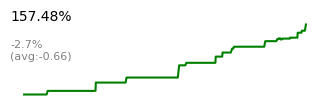

In [6]:
bt.thumbnail()